In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
measure_data = pd.read_csv("drive/My Drive/Ranked-Measure-Data.csv")

In [ ]:
measure_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Premature Death,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Long Commute - Driving Alone,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245
0,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,YPLL Rate (AIAN),...,% Drive Alone (Hispanic) 95% CI - Low,% Drive Alone (Hispanic) 95% CI - High,% Drive Alone (White),% Drive Alone (White) 95% CI - Low,% Drive Alone (White) 95% CI - High,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low,95% CI - High,Quartile
1,01000,Alabama,NaN,NaN,88086,10350,10246,10454,NaN,5967,...,73,76,85,85,85,2146674,35,35,35,NaN
2,01001,Alabama,Autauga,NaN,836,8027,7198,8857,1,NaN,...,NaN,NaN,83,78,88,26458,42,36,47,3
3,01003,Alabama,Baldwin,NaN,3377,8118,7667,8570,1,NaN,...,49,67,80,79,82,102650,38,35,40,2
4,01005,Alabama,Barbour,NaN,539,12877,11150,14604,4,NaN,...,NaN,NaN,84,81,88,8461,37,31,42,2


In [ ]:
current_measurecols = list(measure_data.columns)
new_measurecols = list(measure_data.iloc[0])
measurecol_map = dict(zip(current_measurecols, new_measurecols))
measure_data = measure_data.rename(columns = measurecol_map)
measure_data = measure_data.drop(0)

In [ ]:
measure_data.head()

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,YPLL Rate (AIAN),...,% Drive Alone (Hispanic) 95% CI - Low,% Drive Alone (Hispanic) 95% CI - High,% Drive Alone (White),% Drive Alone (White) 95% CI - Low,% Drive Alone (White) 95% CI - High,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low,95% CI - High,Quartile
1,01000,Alabama,NaN,NaN,88086,10350,10246,10454,NaN,5967,...,73,76,85,85,85,2146674,35,35,35,NaN
2,01001,Alabama,Autauga,NaN,836,8027,7198,8857,1,NaN,...,NaN,NaN,83,78,88,26458,42,36,47,3
3,01003,Alabama,Baldwin,NaN,3377,8118,7667,8570,1,NaN,...,49,67,80,79,82,102650,38,35,40,2
4,01005,Alabama,Barbour,NaN,539,12877,11150,14604,4,NaN,...,NaN,NaN,84,81,88,8461,37,31,42,2
5,01007,Alabama,Bibb,NaN,460,11191,9626,12757,2,NaN,...,NaN,NaN,NaN,NaN,NaN,7994,55,46,64,4


In [ ]:
additional_data = pd.read_csv("drive/My Drive/Additional-Measure-Data.csv")

<ipython-input-82-859fe0852af1>:1: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,

In [ ]:
additional_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Life Expectancy,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 278,% Non-Hispanic White,Unnamed: 280,% Not Proficient in English,Unnamed: 282,Unnamed: 283,Unnamed: 284,% Female,% Rural,Unnamed: 287
0,FIPS,State,County,Life Expectancy,95% CI - Low,95% CI - High,Life Expectancy (AIAN),Life Expectancy (AIAN) 95% CI - Low,Life Expectancy (AIAN) 95% CI - High,Life Expectancy (Asian),...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low,95% CI - High,% Female,# Rural Residents,% Rural
1,01000,Alabama,NaN,74.8,74.8,74.9,111.8,99.3,124.3,87.3,...,4.8,3269726,64.9,48318,1,1,1,51.4,1957932,41.0
2,01001,Alabama,Autauga,76.6,75.8,77.3,NaN,NaN,NaN,NaN,...,3.3,42817,72.5,127,0,0,1,51.4,22921,42.0
3,01003,Alabama,Baldwin,77.7,77.3,78.1,104.6,67.6,141.6,82.5,...,4.8,198970,83.1,1634,1,1,1,51.3,77060,42.3
4,01005,Alabama,Barbour,72.9,71.6,74.1,NaN,NaN,NaN,NaN,...,5.0,11310,45.3,331,1,1,2,46.7,18613,67.8


In [ ]:
current_additionalcols = list(additional_data.columns)
new_additionalcols = list(additional_data.iloc[0])
additionalcol_map = dict(zip(current_additionalcols, new_additionalcols))
additional_data = additional_data.rename(columns = additionalcol_map)
additional_data = additional_data.drop(0)

In [ ]:
additional_data.head()

,FIPS,State,County,Life Expectancy,95% CI - Low,95% CI - High,Life Expectancy (AIAN),Life Expectancy (AIAN) 95% CI - Low,Life Expectancy (AIAN) 95% CI - High,Life Expectancy (Asian),...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low,95% CI - High,% Female,# Rural Residents,% Rural
1,01000,Alabama,NaN,74.8,74.8,74.9,111.8,99.3,124.3,87.3,...,4.8,3269726,64.9,48318,1,1,1,51.4,1957932,41.0
2,01001,Alabama,Autauga,76.6,75.8,77.3,NaN,NaN,NaN,NaN,...,3.3,42817,72.5,127,0,0,1,51.4,22921,42.0
3,01003,Alabama,Baldwin,77.7,77.3,78.1,104.6,67.6,141.6,82.5,...,4.8,198970,83.1,1634,1,1,1,51.3,77060,42.3
4,01005,Alabama,Barbour,72.9,71.6,74.1,NaN,NaN,NaN,NaN,...,5.0,11310,45.3,331,1,1,2,46.7,18613,67.8
5,01007,Alabama,Bibb,73.6,72.4,74.8,NaN,NaN,NaN,NaN,...,3.1,16535,73.6,94,0,0,1,46.0,15663,68.4


In [ ]:
print(measure_data.shape)
print(additional_data.shape)

(3193, 246)
(3193, 288)


In [ ]:
master_df = pd.concat([measure_data, additional_data], axis=1, join='outer')
print(master_df.shape)

(3193, 534)


In [ ]:
master_df.head()

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,YPLL Rate (AIAN),...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low,95% CI - High,% Female,# Rural Residents,% Rural
1,01000,Alabama,NaN,NaN,88086,10350,10246,10454,NaN,5967,...,4.8,3269726,64.9,48318,1,1,1,51.4,1957932,41.0
2,01001,Alabama,Autauga,NaN,836,8027,7198,8857,1,NaN,...,3.3,42817,72.5,127,0,0,1,51.4,22921,42.0
3,01003,Alabama,Baldwin,NaN,3377,8118,7667,8570,1,NaN,...,4.8,198970,83.1,1634,1,1,1,51.3,77060,42.3
4,01005,Alabama,Barbour,NaN,539,12877,11150,14604,4,NaN,...,5.0,11310,45.3,331,1,1,2,46.7,18613,67.8
5,01007,Alabama,Bibb,NaN,460,11191,9626,12757,2,NaN,...,3.1,16535,73.6,94,0,0,1,46.0,15663,68.4


In [ ]:
master_df.head()

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,YPLL Rate (AIAN),...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low,95% CI - High,% Female,# Rural Residents,% Rural
1,01000,Alabama,NaN,NaN,88086,10350,10246,10454,NaN,5967,...,4.8,3269726,64.9,48318,1,1,1,51.4,1957932,41.0
2,01001,Alabama,Autauga,NaN,836,8027,7198,8857,1,NaN,...,3.3,42817,72.5,127,0,0,1,51.4,22921,42.0
3,01003,Alabama,Baldwin,NaN,3377,8118,7667,8570,1,NaN,...,4.8,198970,83.1,1634,1,1,1,51.3,77060,42.3
4,01005,Alabama,Barbour,NaN,539,12877,11150,14604,4,NaN,...,5.0,11310,45.3,331,1,1,2,46.7,18613,67.8
5,01007,Alabama,Bibb,NaN,460,11191,9626,12757,2,NaN,...,3.1,16535,73.6,94,0,0,1,46.0,15663,68.4


In [ ]:
additional_data = additional_data.drop(additional_data.columns[0:3], axis=1)
additional_data.head()

,Life Expectancy,95% CI - Low,95% CI - High,Life Expectancy (AIAN),Life Expectancy (AIAN) 95% CI - Low,Life Expectancy (AIAN) 95% CI - High,Life Expectancy (Asian),Life Expectancy (Asian) 95% CI - Low,Life Expectancy (Asian) 95% CI - High,Life Expectancy (Black),...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low,95% CI - High,% Female,# Rural Residents,% Rural
1,74.8,74.8,74.9,111.8,99.3,124.3,87.3,85.9,88.7,72.4,...,4.8,3269726,64.9,48318,1,1,1,51.4,1957932,41.0
2,76.6,75.8,77.3,NaN,NaN,NaN,NaN,NaN,NaN,73.9,...,3.3,42817,72.5,127,0,0,1,51.4,22921,42.0
3,77.7,77.3,78.1,104.6,67.6,141.6,82.5,79.3,85.8,73.8,...,4.8,198970,83.1,1634,1,1,1,51.3,77060,42.3
4,72.9,71.6,74.1,NaN,NaN,NaN,NaN,NaN,NaN,70.6,...,5.0,11310,45.3,331,1,1,2,46.7,18613,67.8
5,73.6,72.4,74.8,NaN,NaN,NaN,NaN,NaN,NaN,72.3,...,3.1,16535,73.6,94,0,0,1,46.0,15663,68.4


In [ ]:
additional_data.shape

(3193, 285)

In [ ]:
master_df = pd.concat([measure_data, additional_data], axis=1, join='outer')
print(master_df.shape)

(3193, 531)


In [ ]:
master_df.head()

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,YPLL Rate (AIAN),...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low,95% CI - High,% Female,# Rural Residents,% Rural
1,01000,Alabama,NaN,NaN,88086,10350,10246,10454,NaN,5967,...,4.8,3269726,64.9,48318,1,1,1,51.4,1957932,41.0
2,01001,Alabama,Autauga,NaN,836,8027,7198,8857,1,NaN,...,3.3,42817,72.5,127,0,0,1,51.4,22921,42.0
3,01003,Alabama,Baldwin,NaN,3377,8118,7667,8570,1,NaN,...,4.8,198970,83.1,1634,1,1,1,51.3,77060,42.3
4,01005,Alabama,Barbour,NaN,539,12877,11150,14604,4,NaN,...,5.0,11310,45.3,331,1,1,2,46.7,18613,67.8
5,01007,Alabama,Bibb,NaN,460,11191,9626,12757,2,NaN,...,3.1,16535,73.6,94,0,0,1,46.0,15663,68.4


In [ ]:
master_df['County'] = master_df['County'].fillna('STATE')
master_df.head()

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,YPLL Rate (AIAN),...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low,95% CI - High,% Female,# Rural Residents,% Rural
1,01000,Alabama,STATE,NaN,88086,10350,10246,10454,NaN,5967,...,4.8,3269726,64.9,48318,1,1,1,51.4,1957932,41.0
2,01001,Alabama,Autauga,NaN,836,8027,7198,8857,1,NaN,...,3.3,42817,72.5,127,0,0,1,51.4,22921,42.0
3,01003,Alabama,Baldwin,NaN,3377,8118,7667,8570,1,NaN,...,4.8,198970,83.1,1634,1,1,1,51.3,77060,42.3
4,01005,Alabama,Barbour,NaN,539,12877,11150,14604,4,NaN,...,5.0,11310,45.3,331,1,1,2,46.7,18613,67.8
5,01007,Alabama,Bibb,NaN,460,11191,9626,12757,2,NaN,...,3.1,16535,73.6,94,0,0,1,46.0,15663,68.4


In [ ]:
state_df = master_df[master_df['County'] == 'STATE']
state_df.head()

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,YPLL Rate (AIAN),...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low,95% CI - High,% Female,# Rural Residents,% Rural
1,01000,Alabama,STATE,NaN,88086,10350,10246,10454,NaN,5967,...,4.8,3269726,64.9,48318,1,1,1,51.4,1957932,41.0
69,02000,Alaska,STATE,NaN,8663,8269,8030,8509,NaN,18600,...,7.5,434746,59.3,9920,1,1,2,47.6,241338,34.0
99,04000,Arizona,STATE,NaN,90822,7745,7671,7820,NaN,19266,...,32.3,3872615,53.2,281783,4,4,4,50.1,651358,10.2
115,05000,Arkansas,STATE,NaN,50906,9750,9622,9877,NaN,3989,...,8.3,2156694,71.3,47149,2,2,2,50.7,1278329,43.8
191,06000,California,STATE,NaN,378883,5679,5653,5705,NaN,10423,...,40.2,13815325,35.2,3325072,9,9,9,50.0,1880350,5.0


In [ ]:
county_df = master_df[master_df['County'] != 'STATE']
county_df.head()

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,YPLL Rate (AIAN),...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low,95% CI - High,% Female,# Rural Residents,% Rural
2,01001,Alabama,Autauga,NaN,836,8027,7198,8857,1,NaN,...,3.3,42817,72.5,127,0,0,1,51.4,22921,42.0
3,01003,Alabama,Baldwin,NaN,3377,8118,7667,8570,1,NaN,...,4.8,198970,83.1,1634,1,1,1,51.3,77060,42.3
4,01005,Alabama,Barbour,NaN,539,12877,11150,14604,4,NaN,...,5.0,11310,45.3,331,1,1,2,46.7,18613,67.8
5,01007,Alabama,Bibb,NaN,460,11191,9626,12757,2,NaN,...,3.1,16535,73.6,94,0,0,1,46.0,15663,68.4
6,01009,Alabama,Blount,NaN,1143,10787,9825,11749,2,NaN,...,9.9,50970,86.3,957,2,1,2,50.2,51562,90.0


In [ ]:
county_df.shape

(3142, 531)

In [ ]:
import seaborn as sns

In [ ]:
county_df = county_df.dropna(axis=1, how='all')

In [ ]:
county_df.shape

(3142, 526)

In [ ]:
county_df.head()

,FIPS,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,YPLL Rate (AIAN),...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low,95% CI - High,% Female,# Rural Residents,% Rural
2,01001,Alabama,Autauga,NaN,836,8027,7198,8857,1,NaN,...,3.3,42817,72.5,127,0,0,1,51.4,22921,42.0
3,01003,Alabama,Baldwin,NaN,3377,8118,7667,8570,1,NaN,...,4.8,198970,83.1,1634,1,1,1,51.3,77060,42.3
4,01005,Alabama,Barbour,NaN,539,12877,11150,14604,4,NaN,...,5.0,11310,45.3,331,1,1,2,46.7,18613,67.8
5,01007,Alabama,Bibb,NaN,460,11191,9626,12757,2,NaN,...,3.1,16535,73.6,94,0,0,1,46.0,15663,68.4
6,01009,Alabama,Blount,NaN,1143,10787,9825,11749,2,NaN,...,9.9,50970,86.3,957,2,1,2,50.2,51562,90.0


In [ ]:
county_df["Teen Birth Rate"]

2       23
3       24
4       35
5       34
6       30
        ..
3189    27
3190     9
3191    26
3192    21
3193    19
Name: Teen Birth Rate, Length: 3142, dtype: object

In [ ]:
##county_df["Teen Birth Rate"] = county_df["Teen Birth Rate"].dropna()
#county_df["School Funding Adequacy"] = county_df["School Funding Adequacy"].dropna()

In [ ]:
county_df = county_df.dropna(subset = ["Teen Birth Rate", "School Funding Adequacy"])

In [ ]:
print(county_df['Teen Birth Rate'].dtype)
print(county_df['School Funding Adequacy'].dtype)

object
object


In [ ]:
county_df["Teen Birth Rate"].isnull().sum()

0

In [ ]:
print(county_df['Teen Birth Rate'])

2       23
3       24
4       35
5       34
6       30
        ..
3189    27
3190     9
3191    26
3192    21
3193    19
Name: Teen Birth Rate, Length: 2921, dtype: object


In [ ]:
county_df['Teen Birth Rate'] = county_df['Teen Birth Rate'].astype(int)
county_df['Spending per Pupil'] = county_df['Spending per Pupil'].astype(int)

Text(0, 0.5, 'Teen Birth Rate')

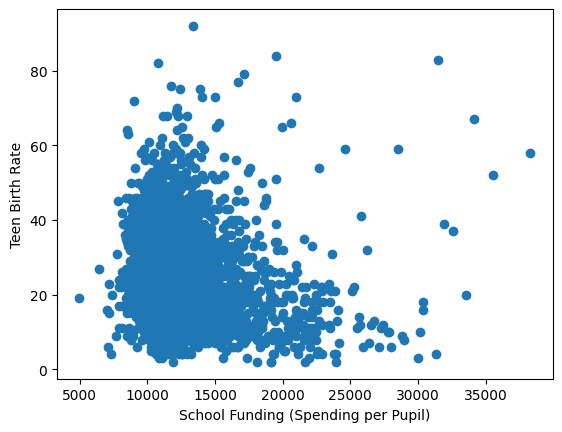

In [ ]:
plt.scatter(county_df['Spending per Pupil'], county_df['Teen Birth Rate'])
plt.xlabel('School Funding (Spending per Pupil)')
plt.ylabel('Teen Birth Rate')

# Teen Birth Rate: expressed per 1,000 females aged 15–19

In [ ]:
county_df['School Funding Adequacy'] = county_df['School Funding Adequacy'].astype(int)

Text(0, 0.5, 'School Funding Adequacy')

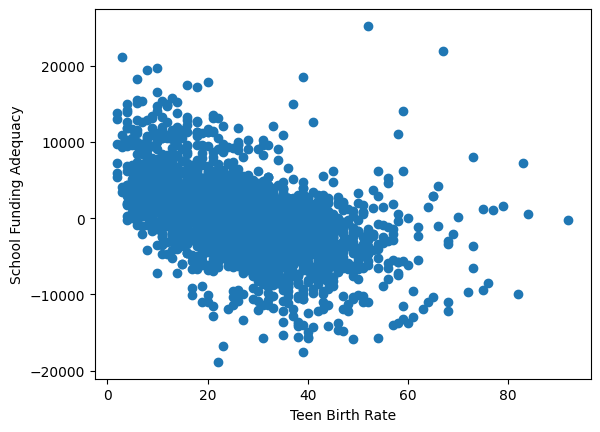

In [ ]:
plt.scatter(county_df['Teen Birth Rate'], county_df['School Funding Adequacy'])
plt.xlabel('Teen Birth Rate')
plt.ylabel('School Funding Adequacy')

In [ ]:
county_df['Gender Pay Gap'] = county_df['Gender Pay Gap'].astype(float)

Text(0, 0.5, 'Gender Pay Gap')

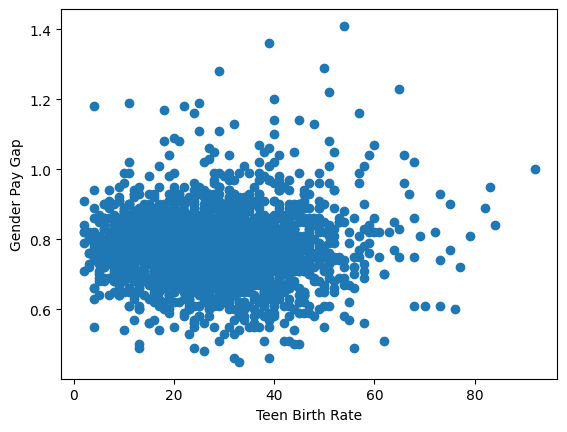

In [ ]:
plt.scatter(county_df['Teen Birth Rate'], county_df['Gender Pay Gap'])
plt.xlabel('Teen Birth Rate')
plt.ylabel('Gender Pay Gap')

In [ ]:
county_df = county_df.dropna(subset = ["% Enrolled in Free or Reduced Lunch"])
county_df['% Enrolled in Free or Reduced Lunch'] = county_df['% Enrolled in Free or Reduced Lunch'].astype(int)

<ipython-input-114-a6efb8abf341>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['% Enrolled in Free or Reduced Lunch'] = county_df['% Enrolled in Free or Reduced Lunch'].astype(int)


Text(0, 0.5, 'Teen Birth Rate')

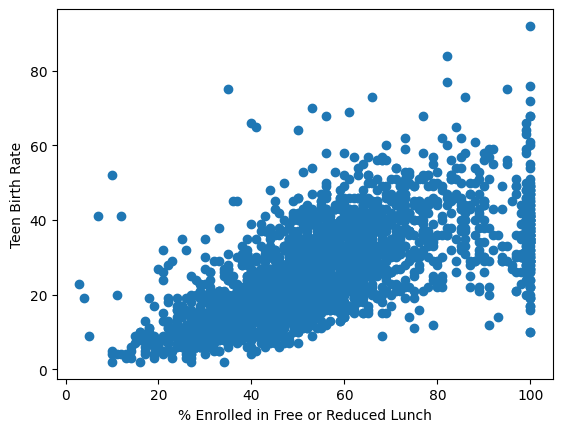

In [ ]:
plt.scatter(county_df['% Enrolled in Free or Reduced Lunch'], county_df['Teen Birth Rate'])
plt.xlabel('% Enrolled in Free or Reduced Lunch')
plt.ylabel('Teen Birth Rate')

In [ ]:
county_df = county_df.dropna(subset = ["Median Household Income"])
county_df['Median Household Income'] = county_df['Median Household Income'].astype(int)

Text(0, 0.5, 'Teen Birth Rate')

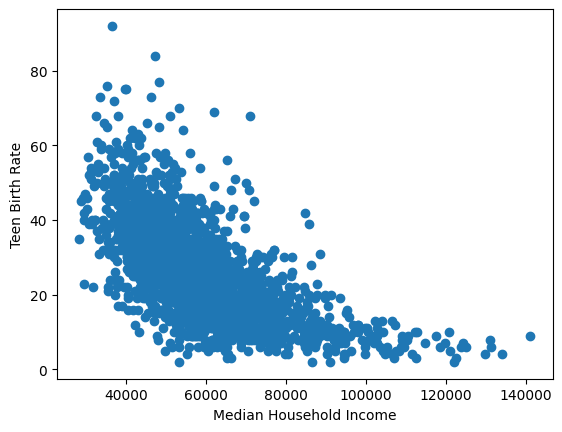

In [ ]:
plt.scatter(county_df['Median Household Income'], county_df['Teen Birth Rate'])
plt.xlabel('Median Household Income')
plt.ylabel('Teen Birth Rate')

<ipython-input-118-d9db9c69fbd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['Life Expectancy'] = county_df['Life Expectancy'].astype(float)


Text(0, 0.5, 'Life Expectancy')

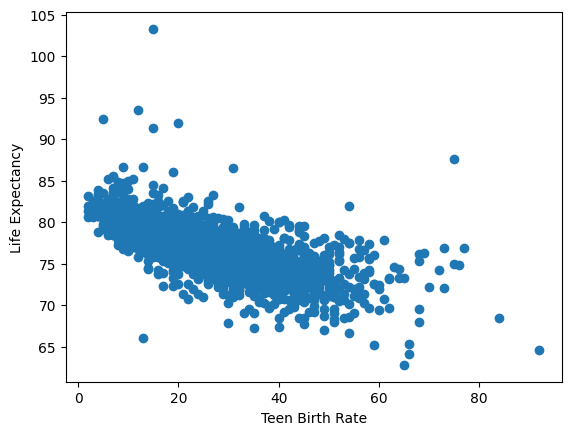

In [ ]:
county_df = county_df.dropna(subset = ["Life Expectancy"])
county_df['Life Expectancy'] = county_df['Life Expectancy'].astype(float)

plt.scatter(county_df['Teen Birth Rate'], county_df['Life Expectancy'])
plt.xlabel('Teen Birth Rate')
plt.ylabel('Life Expectancy')

<ipython-input-119-a646800680fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['% Low Birthweight'] = county_df['% Low Birthweight'].astype(float)


Text(0, 0.5, '% Low Birthweight')

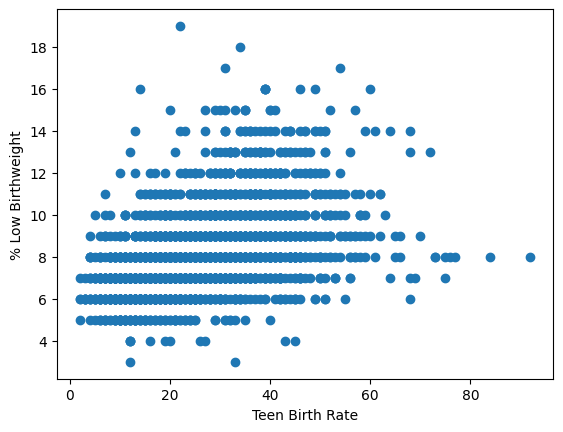

In [ ]:
county_df = county_df.dropna(subset = ["% Low Birthweight"])
county_df['% Low Birthweight'] = county_df['% Low Birthweight'].astype(float)

plt.scatter(county_df['Teen Birth Rate'], county_df['% Low Birthweight'])
plt.xlabel('Teen Birth Rate')
plt.ylabel('% Low Birthweight')

<ipython-input-120-954f8bb61eb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['Chlamydia Rate'] = county_df['Chlamydia Rate'].astype(float)


Text(0, 0.5, 'Chlamydia Rate')

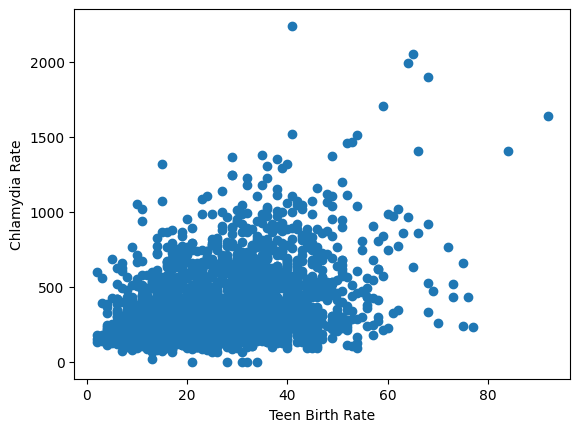

In [ ]:
county_df = county_df.dropna(subset = ["Chlamydia Rate"])
county_df['Chlamydia Rate'] = county_df['Chlamydia Rate'].astype(float)

plt.scatter(county_df['Teen Birth Rate'], county_df['Chlamydia Rate'])
plt.xlabel('Teen Birth Rate')
plt.ylabel('Chlamydia Rate')

Text(0, 0.5, 'Teen Birth Rate')

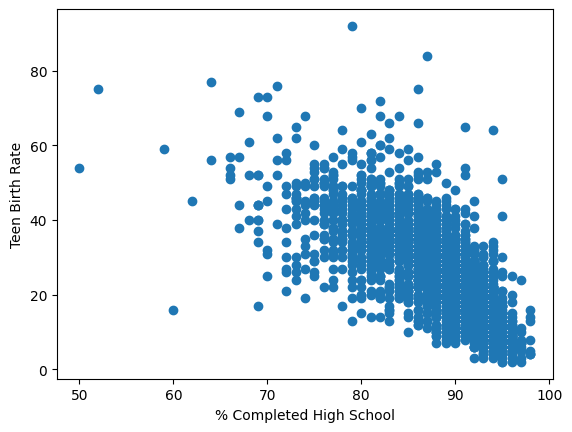

In [ ]:
county_df = county_df.dropna(subset = ["% Completed High School"])
county_df['% Completed High School'] = county_df['% Completed High School'].astype(float)

plt.scatter(county_df['% Completed High School'], county_df['Teen Birth Rate'])
plt.xlabel('% Completed High School')
plt.ylabel('Teen Birth Rate')

Text(0, 0.5, 'Teen Birth Rate')

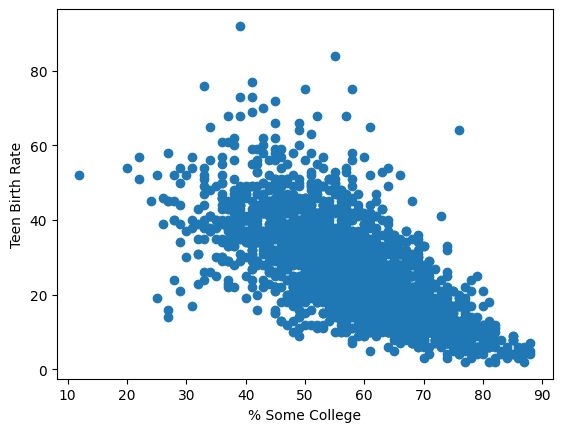

In [ ]:
county_df = county_df.dropna(subset = ["% Some College"])
county_df['% Some College'] = county_df['% Some College'].astype(float)

plt.scatter(county_df['% Some College'], county_df['Teen Birth Rate'])
plt.xlabel('% Some College')
plt.ylabel('Teen Birth Rate')

Text(0, 0.5, '% Children in Poverty')

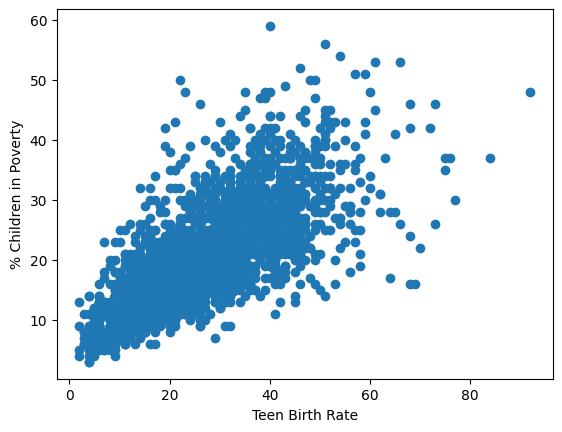

In [ ]:
county_df = county_df.dropna(subset = ["% Children in Poverty"])
county_df['% Children in Poverty'] = county_df['% Children in Poverty'].astype(float)

plt.scatter(county_df['Teen Birth Rate'], county_df['% Children in Poverty'])
plt.xlabel('Teen Birth Rate')
plt.ylabel('% Children in Poverty')

Text(0, 0.5, '% Children in Single-Parent Households')

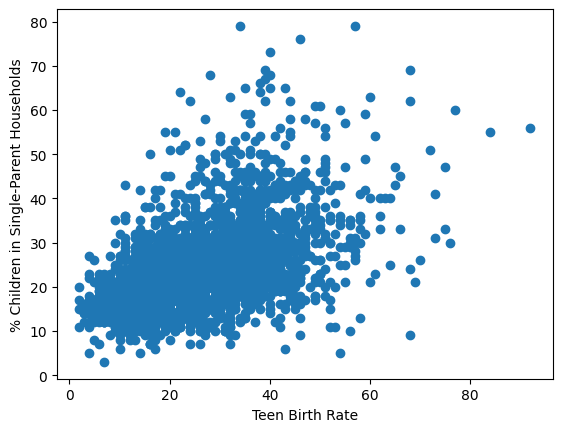

In [ ]:
county_df = county_df.dropna(subset = ["% Children in Single-Parent Households"])
county_df['% Children in Single-Parent Households'] = county_df['% Children in Single-Parent Households'].astype(float)

plt.scatter(county_df['Teen Birth Rate'], county_df['% Children in Single-Parent Households'])
plt.xlabel('Teen Birth Rate')
plt.ylabel('% Children in Single-Parent Households')

Text(0, 0.5, 'Teen Birth Rate')

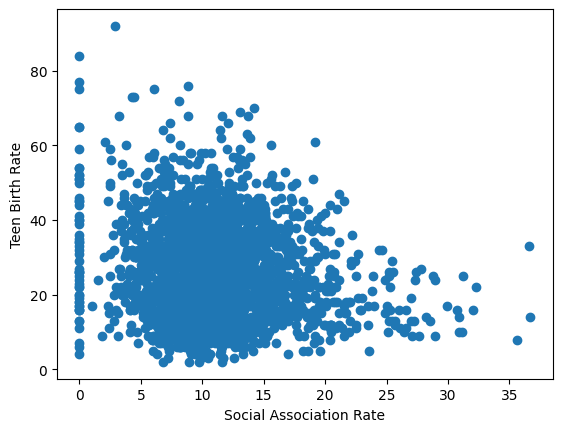

In [ ]:
county_df = county_df.dropna(subset = ["Social Association Rate"])
county_df['Social Association Rate'] = county_df['Social Association Rate'].astype(float)

plt.scatter(county_df['Social Association Rate'], county_df['Teen Birth Rate'])
plt.xlabel('Social Association Rate')
plt.ylabel('Teen Birth Rate')

Text(0, 0.5, 'Teen Birth Rate')

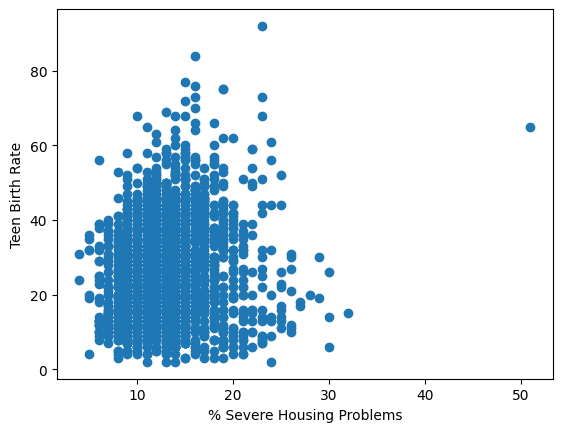

In [ ]:
county_df = county_df.dropna(subset = ["% Severe Housing Problems"])
county_df['% Severe Housing Problems'] = county_df['% Severe Housing Problems'].astype(float)

plt.scatter(county_df['% Severe Housing Problems'], county_df['Teen Birth Rate'])
plt.xlabel('% Severe Housing Problems')
plt.ylabel('Teen Birth Rate')

<ipython-input-127-4570e261978f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['Child Mortality Rate'] = county_df['Child Mortality Rate'].astype(float)


Text(0, 0.5, 'Child Mortality Rate')

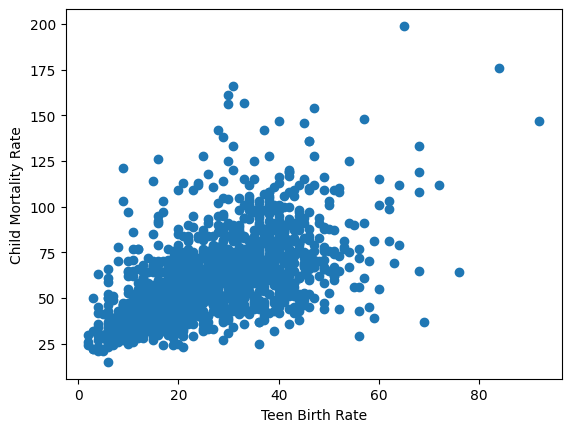

In [ ]:
county_df = county_df.dropna(subset = ["Child Mortality Rate"])
county_df['Child Mortality Rate'] = county_df['Child Mortality Rate'].astype(float)

plt.scatter(county_df['Teen Birth Rate'], county_df['Child Mortality Rate'])
plt.xlabel('Teen Birth Rate')
plt.ylabel('Child Mortality Rate')

<ipython-input-128-8d8f6db39100>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['Infant Mortality Rate'] = county_df['Infant Mortality Rate'].astype(float)


Text(0, 0.5, 'Infant Mortality Rate')

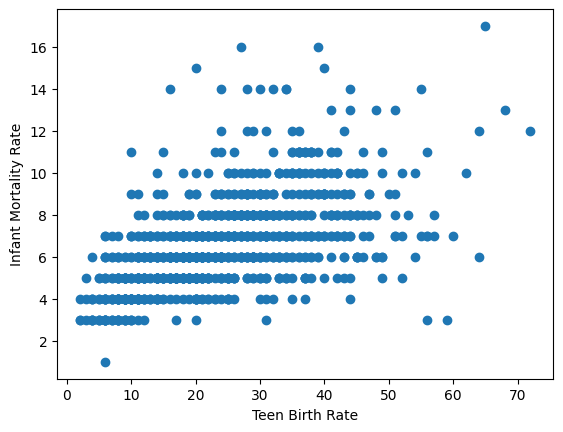

In [ ]:
county_df = county_df.dropna(subset = ["Infant Mortality Rate"])
county_df['Infant Mortality Rate'] = county_df['Infant Mortality Rate'].astype(float)

plt.scatter(county_df['Teen Birth Rate'], county_df['Infant Mortality Rate'])
plt.xlabel('Teen Birth Rate')
plt.ylabel('Infant Mortality Rate')

Text(0, 0.5, '% Frequent Physical Distress')

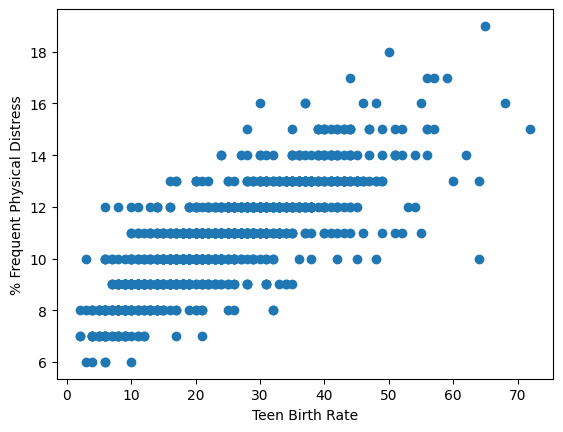

In [ ]:
county_df = county_df.dropna(subset = ["% Frequent Physical Distress"])
county_df['% Frequent Physical Distress'] = county_df['% Frequent Physical Distress'].astype(float)

plt.scatter(county_df['Teen Birth Rate'], county_df['% Frequent Physical Distress'])
plt.xlabel('Teen Birth Rate')
plt.ylabel('% Frequent Physical Distress')

Text(0, 0.5, '% Frequent Mental Distress')

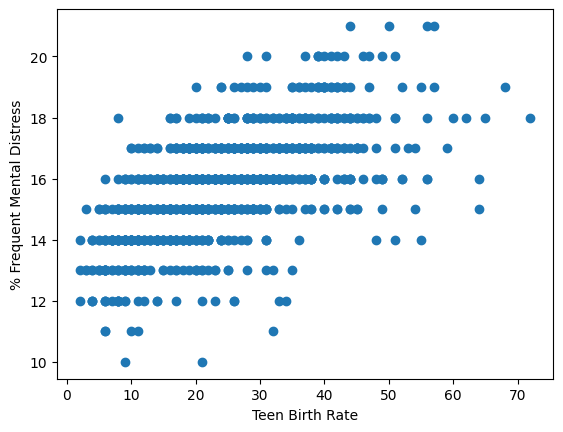

In [ ]:
county_df = county_df.dropna(subset = ["% Frequent Mental Distress"])
county_df['% Frequent Mental Distress'] = county_df['% Frequent Mental Distress'].astype(float)

plt.scatter(county_df['Teen Birth Rate'], county_df['% Frequent Mental Distress'])
plt.xlabel('Teen Birth Rate')
plt.ylabel('% Frequent Mental Distress')

Text(0, 0.5, '% Adults with Diabetes')

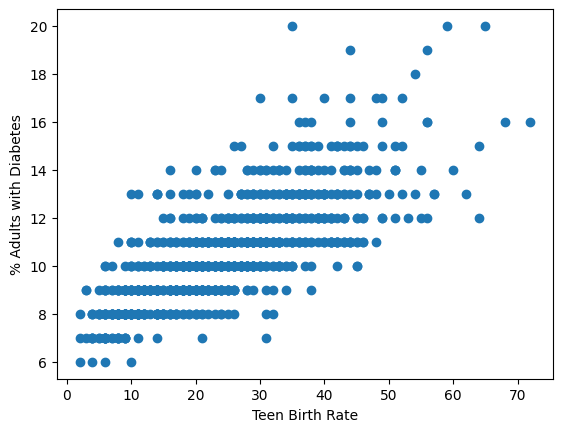

In [ ]:
county_df = county_df.dropna(subset = ["% Adults with Diabetes"])
county_df['% Adults with Diabetes'] = county_df['% Adults with Diabetes'].astype(float)

plt.scatter(county_df['Teen Birth Rate'], county_df['% Adults with Diabetes'])
plt.xlabel('Teen Birth Rate')
plt.ylabel('% Adults with Diabetes')

Text(0, 0.5, 'Teen Birth Rate')

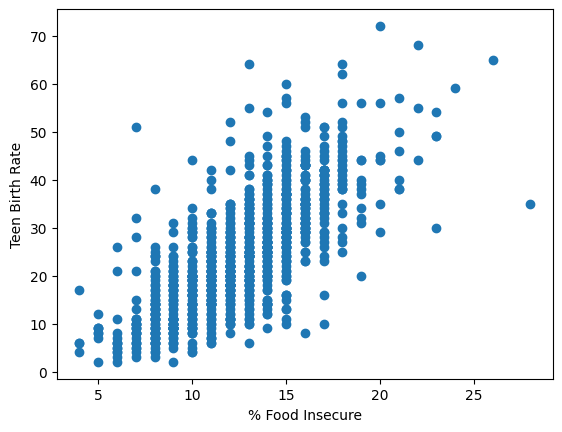

In [ ]:
county_df = county_df.dropna(subset = ["% Food Insecure"])
county_df['% Food Insecure'] = county_df['% Food Insecure'].astype(float)

plt.scatter(county_df['% Food Insecure'], county_df['Teen Birth Rate'])
plt.xlabel('% Food Insecure')
plt.ylabel('Teen Birth Rate')

<ipython-input-133-58d3cac99541>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['% Limited Access to Healthy Foods'] = county_df['% Limited Access to Healthy Foods'].astype(float)


Text(0, 0.5, 'Teen Birth Rate')

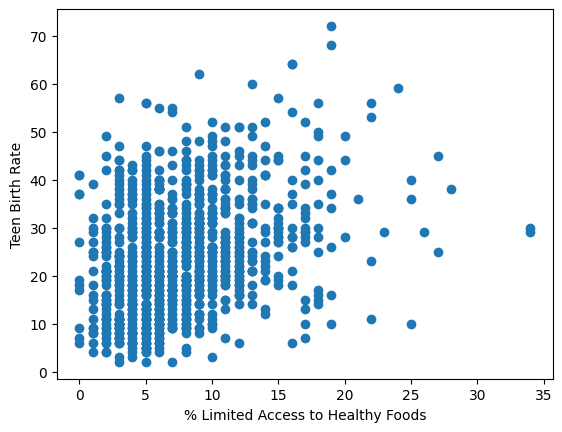

In [ ]:
county_df = county_df.dropna(subset = ["% Limited Access to Healthy Foods"])
county_df['% Limited Access to Healthy Foods'] = county_df['% Limited Access to Healthy Foods'].astype(float)

plt.scatter(county_df['% Limited Access to Healthy Foods'], county_df['Teen Birth Rate'])
plt.xlabel('% Limited Access to Healthy Foods')
plt.ylabel('Teen Birth Rate')

<ipython-input-134-a7c144e3643f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['Drug Overdose Mortality Rate'] = county_df['Drug Overdose Mortality Rate'].astype(float)


Text(0, 0.5, 'Teen Birth Rate')

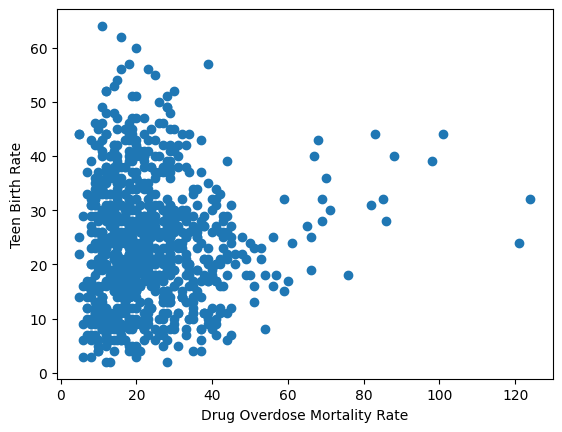

In [ ]:
county_df = county_df.dropna(subset = ["Drug Overdose Mortality Rate"])
county_df['Drug Overdose Mortality Rate'] = county_df['Drug Overdose Mortality Rate'].astype(float)

plt.scatter(county_df['Drug Overdose Mortality Rate'], county_df['Teen Birth Rate'])
plt.xlabel('Drug Overdose Mortality Rate')
plt.ylabel('Teen Birth Rate')

<ipython-input-135-7b74ccc8126c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['Homicide Rate'] = county_df['Homicide Rate'].astype(float)


Text(0, 0.5, 'Teen Birth Rate')

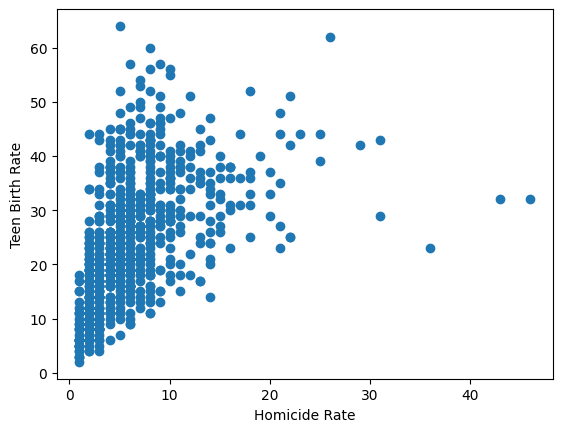

In [ ]:
county_df = county_df.dropna(subset = ["Homicide Rate"])
county_df['Homicide Rate'] = county_df['Homicide Rate'].astype(float)

plt.scatter(county_df['Homicide Rate'], county_df['Teen Birth Rate'])
plt.xlabel('Homicide Rate')
plt.ylabel('Teen Birth Rate')

Text(0, 0.5, 'Teen Birth Rate')

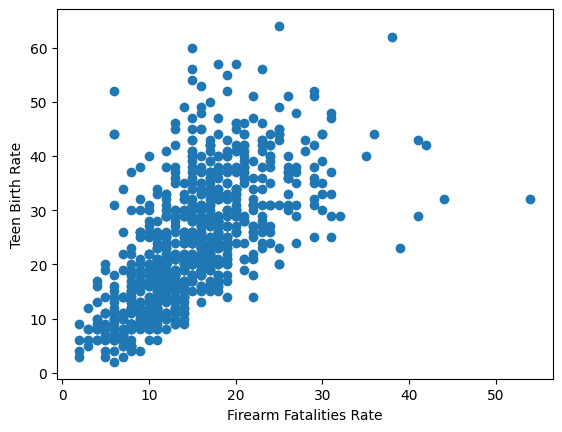

In [ ]:
county_df = county_df.dropna(subset = ["Firearm Fatalities Rate"])
county_df['Firearm Fatalities Rate'] = county_df['Firearm Fatalities Rate'].astype(float)

plt.scatter(county_df['Firearm Fatalities Rate'], county_df['Teen Birth Rate'])
plt.xlabel('Firearm Fatalities Rate')
plt.ylabel('Teen Birth Rate')

<ipython-input-137-efe1730ad166>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['Juvenile Arrest Rate'] = county_df['Juvenile Arrest Rate'].astype(float)


Text(0, 0.5, 'Teen Birth Rate')

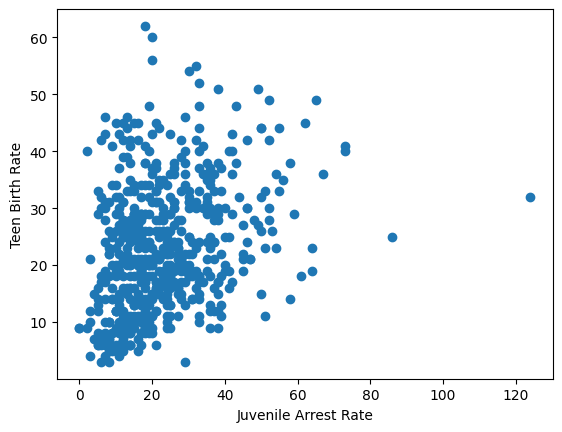

In [ ]:
county_df = county_df.dropna(subset = ["Juvenile Arrest Rate"])
county_df['Juvenile Arrest Rate'] = county_df['Juvenile Arrest Rate'].astype(float)

plt.scatter(county_df['Juvenile Arrest Rate'], county_df['Teen Birth Rate'])
plt.xlabel('Juvenile Arrest Rate')
plt.ylabel('Teen Birth Rate')

Text(0, 0.5, 'Teen Birth Rate')

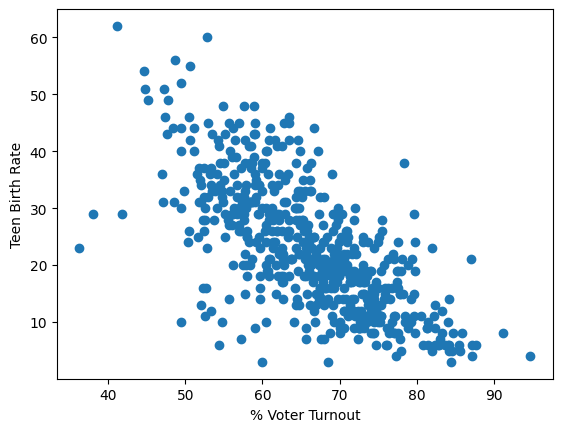

In [ ]:
county_df = county_df.dropna(subset = ["% Voter Turnout"])
county_df['% Voter Turnout'] = county_df['% Voter Turnout'].astype(float)

plt.scatter(county_df['% Voter Turnout'], county_df['Teen Birth Rate'])
plt.xlabel('% Voter Turnout')
plt.ylabel('Teen Birth Rate')

Text(0, 0.5, 'Teen Birth Rate')

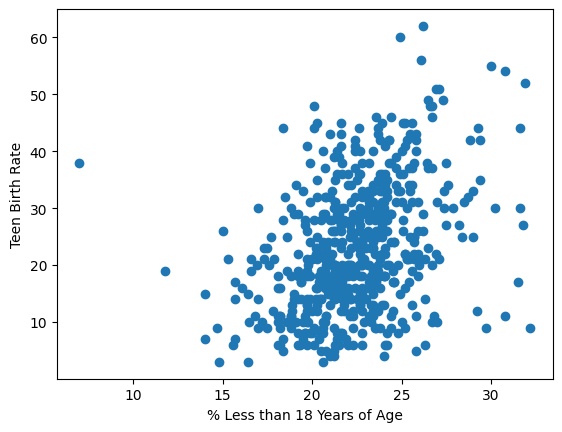

In [ ]:
county_df = county_df.dropna(subset = ["% Less than 18 Years of Age"])
county_df['% Less than 18 Years of Age'] = county_df['% Less than 18 Years of Age'].astype(float)

plt.scatter(county_df['% Less than 18 Years of Age'], county_df['Teen Birth Rate'])
plt.xlabel('% Less than 18 Years of Age')
plt.ylabel('Teen Birth Rate')

Text(0, 0.5, '% Uninsured Children')

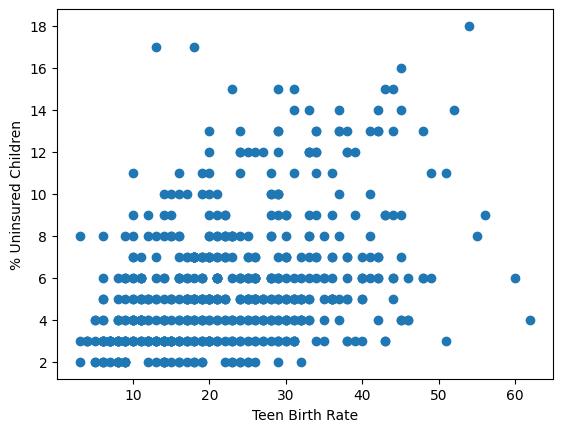

In [ ]:
county_df = county_df.dropna(subset = ["% Uninsured Children"])
county_df['% Uninsured Children'] = county_df['% Uninsured Children'].astype(float)

plt.scatter(county_df['Teen Birth Rate'], county_df['% Uninsured Children'])
plt.xlabel('Teen Birth Rate')
plt.ylabel('% Uninsured Children')

<ipython-input-141-f80189cdd7b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['High School Graduation Rate'] = county_df['High School Graduation Rate'].astype(float)


Text(0, 0.5, 'High School Graduation Rate')

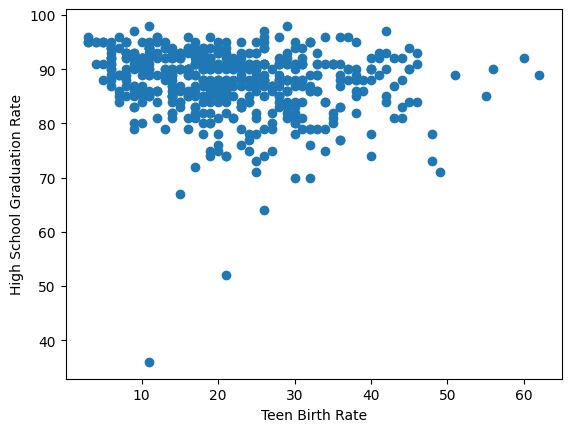

In [ ]:
county_df = county_df.dropna(subset = ["High School Graduation Rate"])
county_df['High School Graduation Rate'] = county_df['High School Graduation Rate'].astype(float)

plt.scatter(county_df['Teen Birth Rate'], county_df['High School Graduation Rate'])
plt.xlabel('Teen Birth Rate')
plt.ylabel('High School Graduation Rate')

Text(0, 0.5, 'Suicide Rate (Age-Adjusted)')

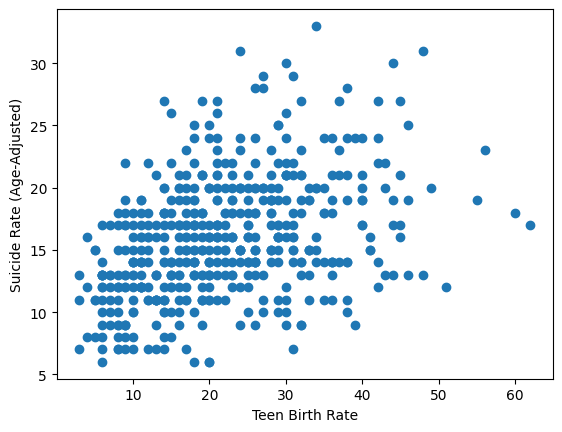

In [ ]:
county_df = county_df.dropna(subset = ["Suicide Rate (Age-Adjusted)"])
county_df['Suicide Rate (Age-Adjusted)'] = county_df['Suicide Rate (Age-Adjusted)'].astype(float)

plt.scatter(county_df['Teen Birth Rate'], county_df['Suicide Rate (Age-Adjusted)'])
plt.xlabel('Teen Birth Rate')
plt.ylabel('Suicide Rate (Age-Adjusted)')

Text(0, 0.5, '% Household Income Required for Child Care Expenses')

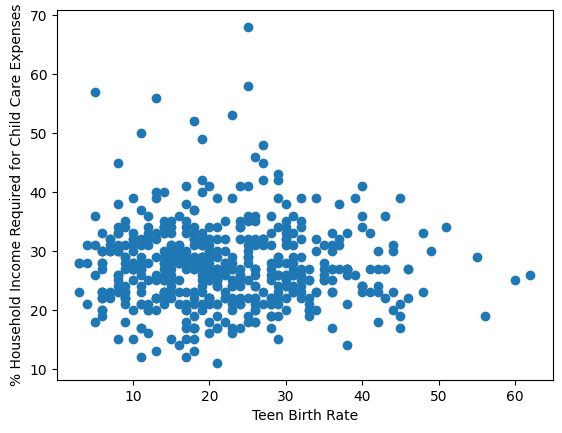

In [ ]:
county_df = county_df.dropna(subset = ["% Household Income Required for Child Care Expenses"])
county_df['% Household Income Required for Child Care Expenses'] = county_df['% Household Income Required for Child Care Expenses'].astype(float)

plt.scatter(county_df['Teen Birth Rate'], county_df['% Household Income Required for Child Care Expenses'])
plt.xlabel('Teen Birth Rate')
plt.ylabel('% Household Income Required for Child Care Expenses')

Text(0, 0.5, 'Teen Birth Rate')

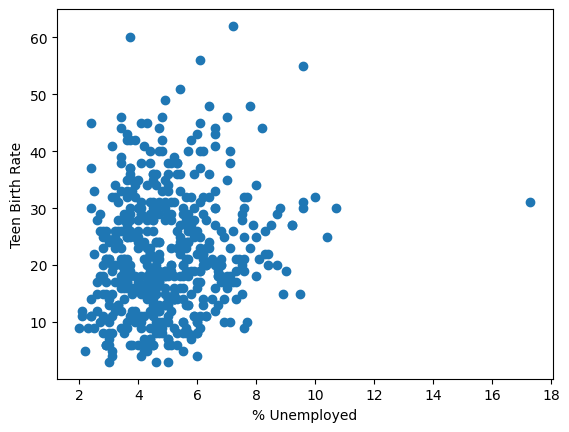

In [ ]:
county_df = county_df.dropna(subset = ["% Unemployed"])
county_df['% Unemployed'] = county_df['% Unemployed'].astype(float)

plt.scatter(county_df['% Unemployed'], county_df['Teen Birth Rate'])
plt.xlabel('% Unemployed')
plt.ylabel('Teen Birth Rate')

<ipython-input-145-61b1296b8b31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['Income Ratio'] = county_df['Income Ratio'].astype(float)


Text(0, 0.5, 'Teen Birth Rate')

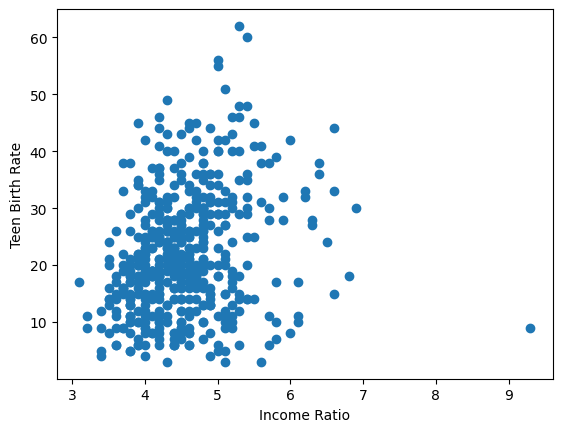

In [ ]:
county_df = county_df.dropna(subset = ["Income Ratio"])
county_df['Income Ratio'] = county_df['Income Ratio'].astype(float)

plt.scatter(county_df['Income Ratio'], county_df['Teen Birth Rate'])
plt.xlabel('Income Ratio')
plt.ylabel('Teen Birth Rate')

In [ ]:
pip install geopandas matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
cols_to_keep = ['School Funding Adequacy', 'Teen Birth Rate', 'Gender Pay Gap', '% Enrolled in Free or Reduced Lunch', 'Median Household Income', 'Life Expectancy', '% Low Birthweight', '% Completed High School', '% Some College', '% Children in Poverty', '% Children in Single-Parent Households', 'Social Association Rate', 'Child Mortality Rate', 'Infant Mortality Rate', '% Frequent Physical Distress', '% Frequent Mental Distress', '% Adults with Diabetes', '% Food Insecure', 'Homicide Rate', 'Firearm Fatalities Rate', 'Juvenile Arrest Rate', '% Voter Turnout', 'High School Graduation Rate', 'Suicide Rate (Age-Adjusted)']

teen_birth_df = county_df[cols_to_keep]
teen_birth_df.head()

,School Funding Adequacy,Teen Birth Rate,Gender Pay Gap,% Enrolled in Free or Reduced Lunch,Median Household Income,Life Expectancy,% Low Birthweight,% Completed High School,% Some College,% Children in Poverty,...,% Frequent Physical Distress,% Frequent Mental Distress,% Adults with Diabetes,% Food Insecure,Homicide Rate,Firearm Fatalities Rate,Juvenile Arrest Rate,% Voter Turnout,High School Graduation Rate,Suicide Rate (Age-Adjusted)
2,-2077,23,0.68,41,66444,76.6,10.0,90.0,60.0,16.0,...,11.0,16.0,11.0,15.0,6.0,18.0,8.0,66.2,87.0,18.0
3,343,24,0.74,46,65658,77.7,8.0,91.0,66.0,16.0,...,10.0,16.0,10.0,12.0,3.0,14.0,26.0,65.3,88.0,20.0
6,-889,30,0.86,51,56894,74.2,8.0,84.0,57.0,17.0,...,12.0,17.0,11.0,14.0,7.0,20.0,6.0,64.2,95.0,21.0
9,-4113,30,0.76,57,48166,72.8,9.0,85.0,55.0,25.0,...,12.0,17.0,12.0,16.0,10.0,26.0,32.0,57.9,91.0,22.0
10,-11973,37,0.79,72,45447,73.8,13.0,83.0,56.0,32.0,...,13.0,18.0,13.0,15.0,11.0,27.0,26.0,58.5,88.0,27.0


In [ ]:
teen_birth_df.shape

(496, 24)

In [ ]:
from sklearn.linear_model import LinearRegression

teen_birth_labels = teen_birth_df['Teen Birth Rate']
teen_birth_features = teen_birth_df.drop(['Teen Birth Rate'], axis=1)

clf = LinearRegression()
clf.fit(teen_birth_features, teen_birth_labels)

print(clf.coef_)

[-1.70061354e-04 -7.80100010e+00 -8.99330413e-03  7.30057779e-05
 -6.89716044e-01  2.77046761e-01 -4.42567033e-01 -2.94422017e-01
  1.57265142e-01  1.56522909e-02  1.88164011e-01  6.52155184e-02
 -1.28784782e-01  8.37906574e-01 -9.15927392e-01 -5.67241714e-01
  1.38045493e-01 -1.13643526e-02  1.27628914e-01  5.85707770e-02
 -1.55908460e-01 -5.05490555e-02  3.04633978e-01]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(teen_birth_features, teen_birth_labels, test_size=0.2)

In [ ]:
clf = LinearRegression()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

In [ ]:
clf.score(X_test, y_test)

0.8302983580118178

In [ ]:
mean_absolute_error(preds, y_test)

3.419282222475108

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(teen_birth_df)

StandardScaler()

In [ ]:
scaled_data = scaler.fit_transform(teen_birth_features)

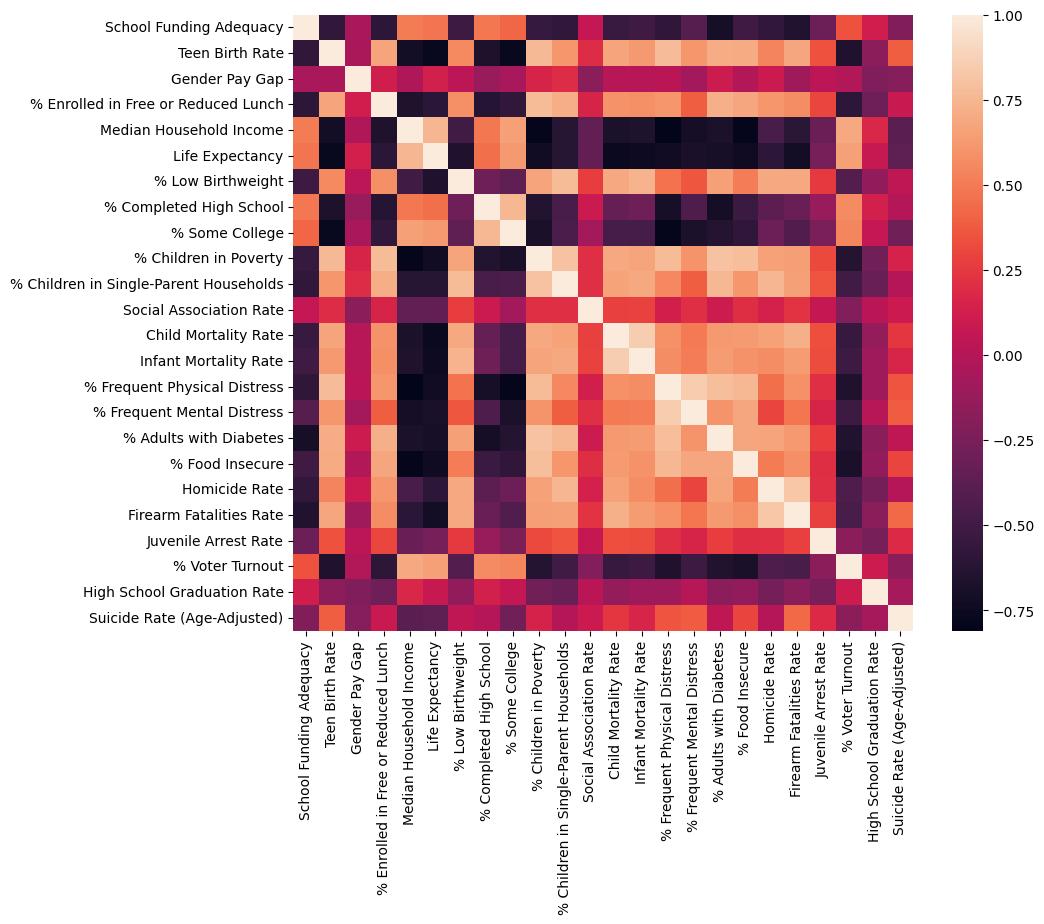

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(teen_birth_df.corr(), annot = False, fmt='.3f')
plt.show()

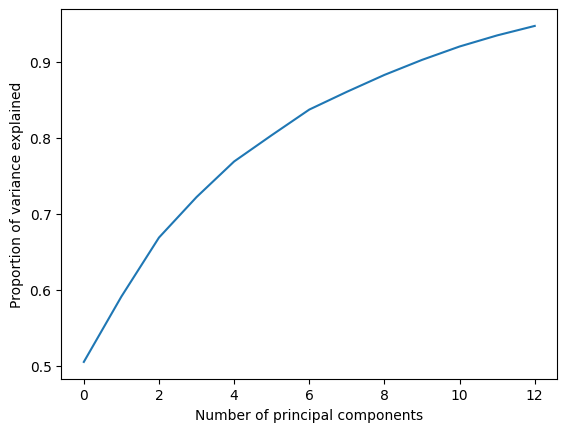

In [ ]:
from sklearn.decomposition import PCA

model = PCA(n_components=13)
model.fit(scaled_data)

plt.plot(model.explained_variance_ratio_.cumsum())
plt.xlabel('Number of principal components')
plt.ylabel('Proportion of variance explained')
plt.show()

In [ ]:
teen_birth_features.shape

(496, 23)

In [ ]:
pd.DataFrame(model.components_,columns=teen_birth_features.columns)

,School Funding Adequacy,Gender Pay Gap,% Enrolled in Free or Reduced Lunch,Median Household Income,Life Expectancy,% Low Birthweight,% Completed High School,% Some College,% Children in Poverty,% Children in Single-Parent Households,...,% Frequent Physical Distress,% Frequent Mental Distress,% Adults with Diabetes,% Food Insecure,Homicide Rate,Firearm Fatalities Rate,Juvenile Arrest Rate,% Voter Turnout,High School Graduation Rate,Suicide Rate (Age-Adjusted)
0,-0.202473,0.013253,0.236464,-0.251876,-0.253864,0.217574,-0.189600,-0.213875,0.266541,0.239502,...,0.251669,0.207758,0.257212,0.244258,0.213690,0.232688,0.106055,-0.213743,-0.065873,0.082595
1,-0.118304,0.326057,0.142578,0.170298,0.140599,0.236618,0.046747,0.227601,0.066422,0.295180,...,-0.232934,-0.352639,0.079874,-0.135783,0.317803,0.061408,0.119564,0.123213,-0.309606,-0.391144
2,-0.060698,0.339146,0.120735,0.016440,0.164285,-0.228039,-0.460358,-0.275954,0.098122,-0.035385,...,0.184939,0.057036,0.160239,0.044866,-0.128689,-0.250303,-0.097167,-0.102090,-0.081129,-0.188138
3,-0.173201,0.066985,-0.007169,-0.049965,0.061581,-0.152644,0.096667,-0.021981,-0.038038,-0.053670,...,0.018585,0.002746,-0.114457,-0.029987,-0.065686,0.145952,0.505426,0.157048,-0.471404,0.547072
4,0.443823,0.287230,0.071238,-0.225840,-0.002366,-0.097162,0.073668,-0.036797,0.131067,0.065334,...,-0.032299,0.024763,-0.119030,0.085455,-0.210901,-0.277643,0.164176,-0.183384,-0.389297,-0.094245
5,-0.071335,-0.292072,0.050844,0.035612,0.027449,0.012060,-0.125135,-0.142392,-0.025525,0.022279,...,-0.040862,-0.069842,0.086354,-0.127757,-0.204734,-0.238578,0.732195,0.018039,0.303976,-0.298730
6,0.041373,-0.692343,0.221394,0.065174,0.003025,-0.081535,-0.238718,0.054369,0.020660,-0.015956,...,-0.060480,-0.180507,0.059055,0.071204,0.137874,0.061640,-0.079734,-0.153141,-0.409816,-0.087223
7,0.157223,-0.021756,0.109670,-0.073659,-0.080099,-0.110619,0.115307,0.261425,-0.067635,-0.106667,...,-0.152908,-0.253645,-0.098036,0.271863,-0.048803,-0.096533,0.030312,-0.593553,0.072427,0.043600
8,0.367435,-0.244911,-0.297142,0.138572,-0.148668,0.182456,0.066472,-0.148559,0.043985,0.033009,...,0.094467,0.303939,0.004681,-0.057576,-0.051856,-0.130909,-0.081543,0.193423,-0.367496,-0.201624
9,-0.325024,-0.084899,-0.099015,-0.192215,0.149105,-0.093322,0.327047,0.472609,0.010405,0.072765,...,0.143978,0.380705,0.177025,0.357318,-0.064626,-0.161267,0.054054,0.047131,-0.072160,-0.262705


In [ ]:
results = pd.DataFrame(model.components_,columns=teen_birth_features.columns)

In [ ]:
x_pca = model.transform(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [ ]:
model.components_

array([[ 1.58489368e-01, -4.63884510e-04, -1.00180886e-07,
        -7.92328935e-04,  9.87359633e-01,  1.26407578e-04,
        -5.43732746e-05,  1.40844005e-04,  3.90880776e-04,
        -3.38779610e-04, -2.88782525e-04, -6.59022430e-05,
        -6.90444100e-04, -7.56820888e-05, -8.75100625e-05,
        -6.61629684e-05, -7.46714100e-05, -1.41765877e-04,
        -1.49116425e-04, -2.54577834e-04, -2.74016137e-04,
         3.75283868e-04,  6.36394586e-05, -1.09195352e-04],
       [ 9.87358301e-01, -5.37683405e-04, -7.05565081e-07,
        -1.26800819e-03, -1.58491723e-01,  5.68012850e-05,
        -1.18951064e-04,  2.92777262e-04,  1.85869868e-04,
        -2.54693918e-04, -5.06786538e-04,  2.20116189e-04,
        -7.95059431e-04, -7.81354724e-05, -7.21074248e-05,
        -9.10429196e-06, -1.65123680e-04, -6.98622066e-05,
        -4.68228738e-04, -6.04206144e-04, -5.37396044e-04,
        -6.16149581e-05,  4.75627112e-05, -2.03391880e-05],
       [ 2.04918031e-03,  2.28958759e-01,  3.95116293e

In [ ]:
import geopandas as gpd

In [ ]:
state_df['Gender Pay Gap']

1       0.74
69      0.83
99      0.83
115     0.81
191     0.86
250     0.82
315     0.82
324     0.85
328     0.87
330     0.84
398     0.81
558     0.83
564     0.76
609     0.80
712     0.76
805     0.78
905     0.78
1011    0.78
1132    0.71
1197    0.82
1214    0.87
1239    0.83
1254    0.77
1338    0.82
1426    0.76
1509    0.79
1625    0.77
1682    0.79
1776    0.85
1794    0.79
1805    0.80
1827    0.82
1861    0.86
1924    0.83
2025    0.79
2079    0.79
2168    0.75
2246    0.82
2283    0.79
2351    0.82
2357    0.78
2404    0.78
2471     0.8
2567     0.8
2822    0.71
2852    0.89
2867     0.8
3001    0.79
3041    0.74
3097     0.8
3170    0.68
Name: Gender Pay Gap, dtype: object

In [ ]:
state_df['State']

1                    Alabama
69                    Alaska
99                   Arizona
115                 Arkansas
191               California
250                 Colorado
315              Connecticut
324                 Delaware
328     District of Columbia
330                  Florida
398                  Georgia
558                   Hawaii
564                    Idaho
609                 Illinois
712                  Indiana
805                     Iowa
905                   Kansas
1011                Kentucky
1132               Louisiana
1197                   Maine
1214                Maryland
1239           Massachusetts
1254                Michigan
1338               Minnesota
1426             Mississippi
1509                Missouri
1625                 Montana
1682                Nebraska
1776                  Nevada
1794           New Hampshire
1805              New Jersey
1827              New Mexico
1861                New York
1924          North Carolina
2025          

In [ ]:
usa_shapefile = gpd.read_file('/Macintosh HD/Users/nataliechapin/Downloads/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp')

ERROR:fiona._env:/Macintosh HD/Users/nataliechapin/Downloads/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp: No such file or directory


DriverError: ignored

In [ ]:
merged = usa_shapefile.merge(state_df, left_on='name', right_on='State', how='left')

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='Gender Pay Gap', cmap='RdYlBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Gender Pay Gap in the United States')
ax.axis('off')

plt.show()